In [1]:
from qiskit import BasicAer, Aer
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit.library import TwoLocal, ZZFeatureMap
from qiskit_machine_learning.algorithms import VQC
from qiskit_machine_learning.datasets import ad_hoc_data

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
seed = 1376
algorithm_globals.random_seed = seed

In [3]:
# Descomente la siguiente linea si desea ver las imágenes más grandes.
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

In [4]:
# Use ad hoc data set for training and test data
feature_dim = 2  # dimension of each data point
training_size = 20
test_size = 10

In [5]:
# training features, training labels, test features, test labels as np.array,
# one hot encoding for labels
training_features, training_labels, test_features, test_labels = \
    ad_hoc_data(
            training_size=training_size, test_size=test_size, n=feature_dim, gap=0.3)

In [6]:
training_features

array([[3.95840674, 4.08407045],
       [1.31946891, 0.06283185],
       [4.0212386 , 0.81681409],
       [4.27256601, 5.46637122],
       [5.90619419, 2.89026524],
       [4.39822972, 5.52920307],
       [5.84336234, 1.00530965],
       [3.51858377, 0.31415927],
       [1.88495559, 5.15221195],
       [5.96902604, 4.0212386 ],
       [3.64424748, 0.81681409],
       [6.1575216 , 3.95840674],
       [0.62831853, 5.27787566],
       [5.52920307, 5.59203492],
       [1.44513262, 4.64955713],
       [0.12566371, 0.12566371],
       [5.27787566, 4.64955713],
       [1.0681415 , 3.64424748],
       [5.84336234, 3.64424748],
       [0.62831853, 5.0893801 ],
       [0.43982297, 4.27256601],
       [1.44513262, 3.14159265],
       [6.09468975, 4.83805269],
       [4.33539786, 4.77522083],
       [4.64955713, 4.39822972],
       [1.75929189, 3.76991118],
       [4.1469023 , 2.07345115],
       [3.45575192, 5.34070751],
       [1.75929189, 3.83274304],
       [0.12566371, 4.71238898],
       [1.

In [7]:
training_labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [8]:
test_features

array([[2.19911486, 3.76991118],
       [5.78053048, 4.46106157],
       [4.83805269, 1.38230077],
       [5.90619419, 0.75398224],
       [3.26725636, 0.18849556],
       [4.52389342, 0.56548668],
       [5.96902604, 4.0212386 ],
       [2.38761042, 2.26194671],
       [3.76991118, 0.75398224],
       [0.69115038, 2.57610598],
       [0.37699112, 0.9424778 ],
       [4.46106157, 3.45575192],
       [2.95309709, 4.96371639],
       [2.63893783, 4.96371639],
       [0.18849556, 4.64955713],
       [4.64955713, 3.0787608 ],
       [5.27787566, 0.37699112],
       [5.15221195, 2.45044227],
       [1.94778745, 0.18849556],
       [0.06283185, 5.90619419]])

In [9]:
test_labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [10]:
feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement="linear")
ansatz = TwoLocal(feature_map.num_qubits, ['ry', 'rz'], 'cz', reps=3)

In [11]:
#from qiskit.circuit import QuantumCircuit
#qc = feature_map.assign_parameters([0.1, 0.1])

In [12]:
#qc.draw()

In [13]:
#qc.decompose().draw('mpl')

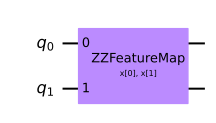

In [15]:
feature_map.draw('mpl')

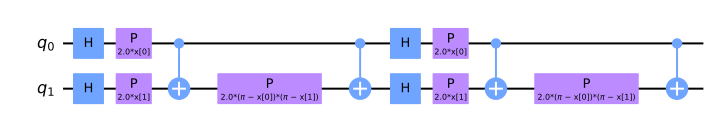

In [16]:
feature_map.decompose().draw('mpl')

In [17]:
#from qiskit import QuantumCircuit, Aer, assemble
#import numpy as np
#from qiskit.visualization import plot_histogram, plot_bloch_multivector
#from qiskit.visualization import array_to_latex

#usim = Aer.get_backend('aer_simulator')

In [20]:
#qc.decompose().save_unitary()
#qobj = assemble(qc.decompose())
#unitary2 = usim.run(qobj).result().get_unitary()

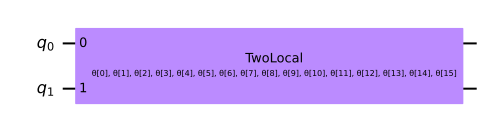

In [17]:
display(ansatz.draw('mpl'))

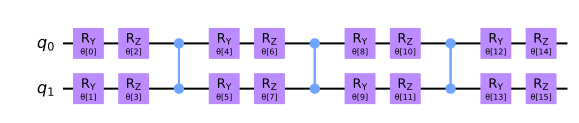

In [18]:
display(ansatz.decompose().draw('mpl'))

In [19]:
# callback function that draws a live plot when the .fit() method is called
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [20]:
quantum_instance = QuantumInstance(Aer.get_backend("aer_simulator"), 
                                   shots=1024)
                                   
#quantum_instance = QuantumInstance(BasicAer.get_backend('statevector_simulator'),
#                                           shots=1024,
#                                           seed_simulator=seed,
#                                           seed_transpiler=seed)

In [16]:
#vqc = VQC(feature_map=feature_map,
#          ansatz=ansatz,
#          optimizer=COBYLA(maxiter=100),
#          quantum_instance=QuantumInstance(BasicAer.get_backend('statevector_simulator'),
#                                           shots=1024,
#                                           seed_simulator=seed,
#                                           seed_transpiler=seed)
#          )

In [21]:
# construct variational quantum classifier
vqc = VQC(feature_map=feature_map,
          ansatz=ansatz,
          optimizer=COBYLA(maxiter=100),
          quantum_instance=quantum_instance
#          callback=callback_graph
         )

In [22]:
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

In [23]:
# fit classifier to data
#vqc.fit(X, y_one_hot)
vqc.fit(training_features, training_labels)

In [18]:
# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

In [19]:
# score classifier
#vqc.score(X, y_one_hot)
score = vqc.score(test_features, test_labels)
print(f"Testing accuracy: {score:0.2f}")

Testing accuracy: 0.90


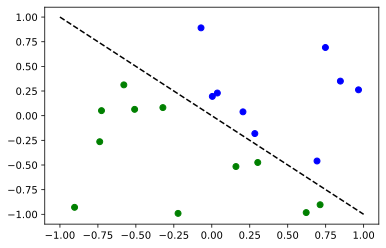

In [20]:
num_inputs = 2
num_samples = 20
X = 2 * algorithm_globals.random.random([num_samples, num_inputs]) - 1
y01 = 1 * (np.sum(X, axis=1) >= 0)  # in { 0,  1}
y = 2 * y01 - 1  # in {-1, +1}
y_one_hot = np.zeros((num_samples, 2))
for i in range(num_samples):
    y_one_hot[i, y01[i]] = 1

for x, y_target in zip(X, y):
    if y_target == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "go")
plt.plot([-1, 1], [1, -1], "--", color="black")
plt.show()

In [21]:
y

array([-1,  1, -1,  1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1,
       -1, -1, -1])

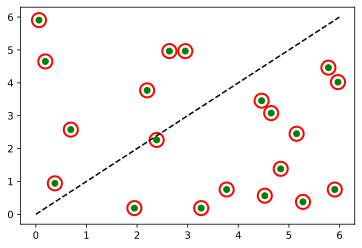

In [22]:
y_one_hot = np.zeros((20, 2))

# evaluate data points
#y_predict = vqc.predict(X)
y_predict = vqc.predict(test_features)


# plot results
# red == wrongly classified
for x, y_target, y_p in zip(test_features, y_one_hot, y_predict):
    if y_target[0] == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "go")
    if not np.all(y_target == y_p):
        plt.scatter(x[0], x[1], s=200, facecolors="none", edgecolors="r", linewidths=2)
plt.plot([0, 6], [0, 6], "--", color="black")
plt.show()

In [23]:
np.min(test_features), np.max(test_features)

(0.06283185307179587, 5.969026041820608)

In [24]:
X

array([[ 0.71335661, -0.90304761],
       [ 0.96623985,  0.26228368],
       [-0.22211014, -0.99073633],
       [ 0.84689569,  0.35052133],
       [-0.07085798,  0.8906361 ],
       [-0.57917713,  0.3124157 ],
       [-0.50806828,  0.06419931],
       [-0.32201707,  0.08209671],
       [ 0.15910002, -0.51562936],
       [ 0.03672568,  0.22978189],
       [-0.73791571, -0.26396428],
       [ 0.74834978,  0.69138782],
       [ 0.00362483,  0.19554171],
       [ 0.28349233, -0.18134488],
       [ 0.20534542,  0.03904515],
       [-0.72631122,  0.05109131],
       [ 0.6930185 , -0.45955706],
       [ 0.62174663, -0.98240524],
       [ 0.30274411, -0.47459189],
       [-0.90358894, -0.92924194]])

In [25]:
y_one_hot

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [26]:
y_predict

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [27]:
test_features

array([[2.19911486, 3.76991118],
       [5.78053048, 4.46106157],
       [4.83805269, 1.38230077],
       [5.90619419, 0.75398224],
       [3.26725636, 0.18849556],
       [4.52389342, 0.56548668],
       [5.96902604, 4.0212386 ],
       [2.38761042, 2.26194671],
       [3.76991118, 0.75398224],
       [0.69115038, 2.57610598],
       [0.37699112, 0.9424778 ],
       [4.46106157, 3.45575192],
       [2.95309709, 4.96371639],
       [2.63893783, 4.96371639],
       [0.18849556, 4.64955713],
       [4.64955713, 3.0787608 ],
       [5.27787566, 0.37699112],
       [5.15221195, 2.45044227],
       [1.94778745, 0.18849556],
       [0.06283185, 5.90619419]])

In [28]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright